In [1117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import stats
from warnings import filterwarnings
filterwarnings("ignore")

In [1118]:
df1_holiday=pd.read_csv('Holiday_Package.csv')

In [1119]:
df1_holiday.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [1120]:
df1_holiday.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

In [1121]:
print('The dataset has {} rows and {} columns.'.format(df1_holiday.shape[0],df1_holiday.shape[1]))
print('\n')

The dataset has 872 rows and 8 columns.




In [1122]:
df1=df1_holiday.drop('Unnamed: 0',axis=1)

In [1123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1124]:
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1125]:
df1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [1126]:
df1.duplicated().sum()

0

In [1127]:
df1['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [1128]:
df1['foreign'].value_counts()

no     656
yes    216
Name: foreign, dtype: int64



Skewness of Salary: 3.10
Kurtosis of Salary: 15.85
Outliers of Salary: 0.57


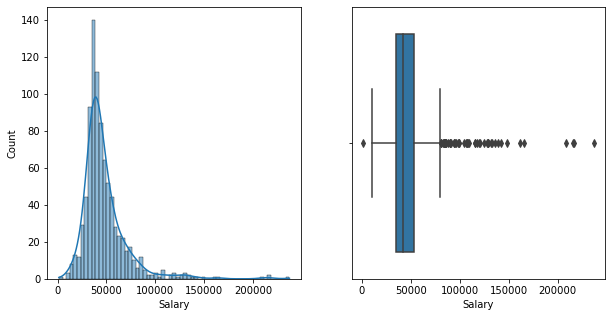

In [1129]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df1['Salary'], kde=True, ax=axes[0])
sns.boxplot(x='Salary', data=df1, ax=axes[1])
print('\n')
skew=df1['Salary'].skew()
print('Skewness of Salary: %.2f' % skew)
kurtosis=df1['Salary'].kurtosis()
print('Kurtosis of Salary: %.2f' % kurtosis)
Q1 = df1['Salary'].quantile(0.25)
Q3 = df1['Salary'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df1['Salary'] < (Q1 - 1.5 * IQR)) | (df1['Salary']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of Salary: {}'.format(outlier/100))



Skewness of age: 0.15
Kurtosis of age: -0.91
Outliers of age: 0.0


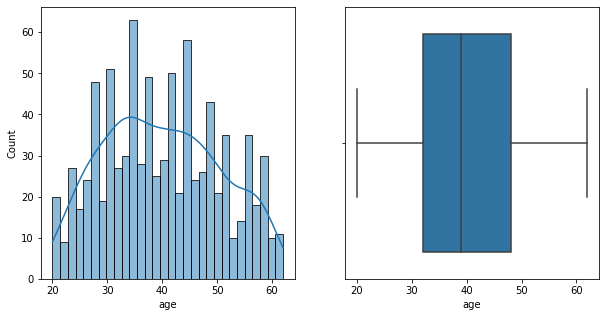

In [1130]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df1['age'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='age', data=df1, ax=axes[1])
print('\n')
skew=df1['age'].skew()
print('Skewness of age: %.2f' % skew)
kurtosis=df1['age'].kurtosis()
print('Kurtosis of age: %.2f' % kurtosis)
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df1['age'] < (Q1 - 1.5 * IQR)) | (df1['age']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of age: {}'.format(outlier/100))



Skewness of educ: -0.05
Kurtosis of educ: 0.01
Outliers of educ: 0.04


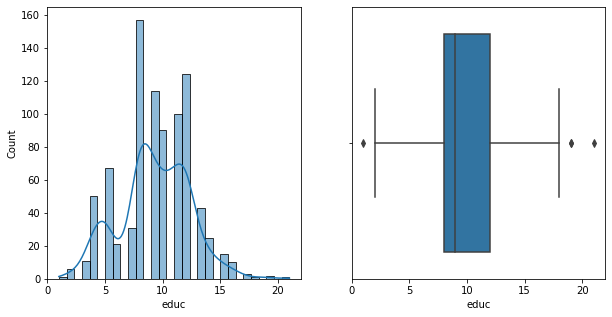

In [1131]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df1['educ'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='educ', data=df1, ax=axes[1])
print('\n')
skew=df1['educ'].skew()
print('Skewness of educ: %.2f' % skew)
kurtosis=df1['educ'].kurtosis()
print('Kurtosis of educ: %.2f' % kurtosis)
Q1 = df1['educ'].quantile(0.25)
Q3 = df1['educ'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df1['educ'] < (Q1 - 1.5 * IQR)) | (df1['educ']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of educ: {}'.format(outlier/100))



Skewness of no_young_children: 1.95
Kurtosis of no_young_children: 3.11
Outliers of no_young_children: 2.07


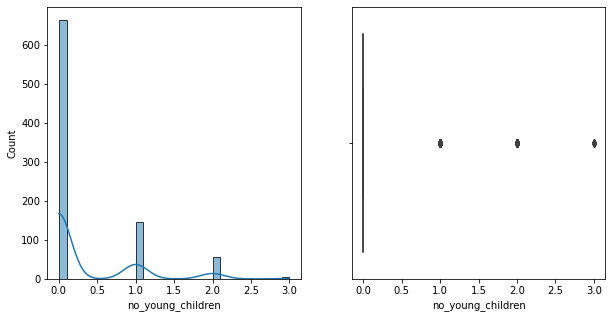

In [1132]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df1['no_young_children'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='no_young_children', data=df1, ax=axes[1])
print('\n')
skew=df1['no_young_children'].skew()
print('Skewness of no_young_children: %.2f' % skew)
kurtosis=df1['no_young_children'].kurtosis()
print('Kurtosis of no_young_children: %.2f' % kurtosis)
Q1 = df1['no_young_children'].quantile(0.25)
Q3 = df1['no_young_children'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df1['no_young_children'] < (Q1 - 1.5 * IQR)) | (df1['no_young_children']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of no_young_children: {}'.format(outlier/100))



Skewness of no_older_children: 0.95
Kurtosis of no_older_children: 0.68
Outliers of no_older_children: 0.02


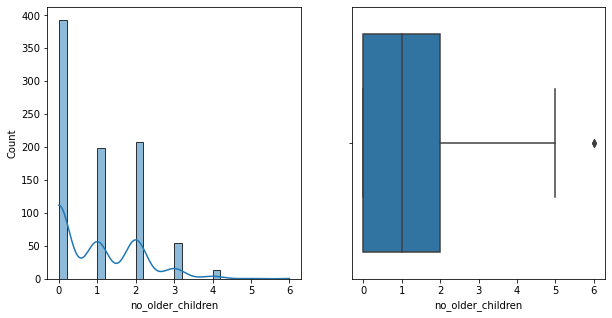

In [1133]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(10,5)
sns.histplot(df1['no_older_children'], kde=True, ax=axes[0],bins=30)
sns.boxplot(x='no_older_children', data=df1, ax=axes[1])
print('\n')
skew=df1['no_older_children'].skew()
print('Skewness of no_older_children: %.2f' % skew)
kurtosis=df1['no_older_children'].kurtosis()
print('Kurtosis of no_older_children: %.2f' % kurtosis)
Q1 = df1['no_older_children'].quantile(0.25)
Q3 = df1['no_older_children'].quantile(0.75)
IQR = Q3 - Q1
outlier=((df1['no_older_children'] < (Q1 - 1.5 * IQR)) | (df1['no_older_children']> (Q3 + 1.5 * IQR))).sum()
print('Outliers of no_older_children: {}'.format(outlier/100))

In [1134]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

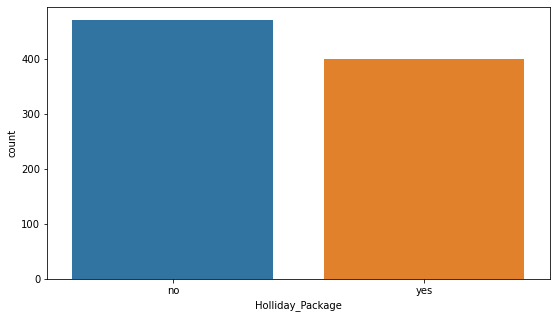

no     471
yes    401
Name: Holliday_Package, dtype: int64

In [1135]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1,x='Holliday_Package')
plt.show()
df1['Holliday_Package'].value_counts()

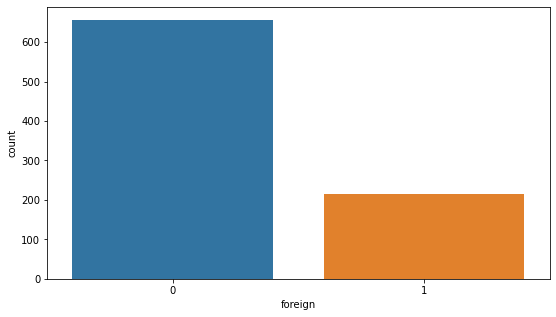

0    0.752294
1    0.247706
Name: foreign, dtype: float64

In [1216]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1,x='foreign')
plt.show()
df1['foreign'].value_counts(normalize=True)

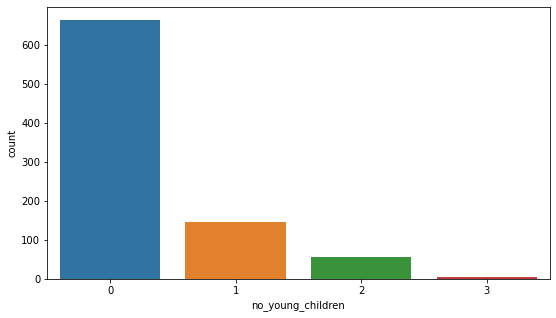

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

In [1137]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1,x='no_young_children')
plt.show()
df1['no_young_children'].value_counts()

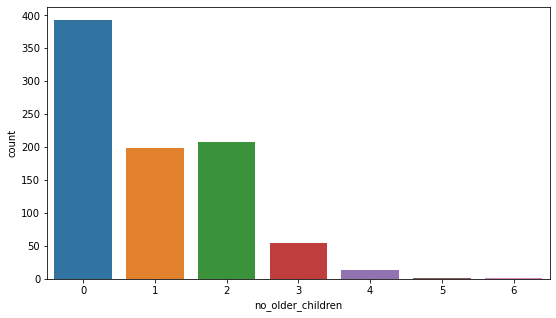

0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64

In [1138]:
plt.figure(figsize=(9,5))
sns.countplot(data=df1,x='no_older_children')
plt.show()
df1['no_older_children'].value_counts()

In [1139]:
feature_list_holiday = df1[['Salary', 'age', 'educ',]].columns
feature_list_holiday

Index(['Salary', 'age', 'educ'], dtype='object')

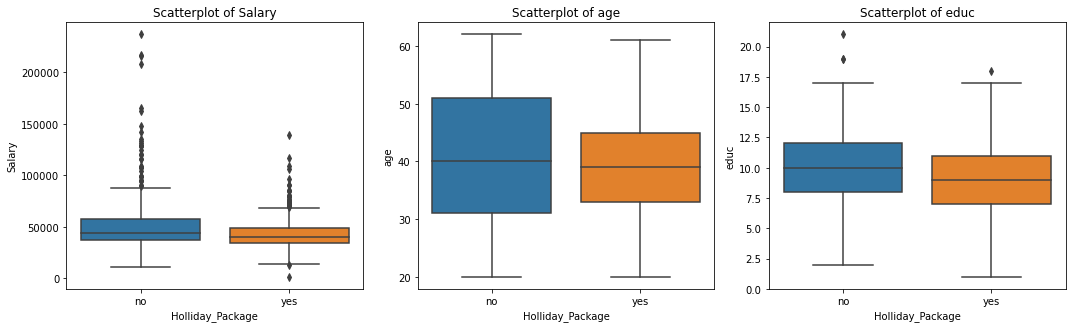

In [1140]:
plt.figure(figsize=(15,30))
for i in range(len(feature_list_holiday)):
    plt.subplot(7,3,i+1)
    sns.boxplot(x='Holliday_Package',y=feature_list_holiday[i],data=df1)
    plt.title('Scatterplot of {}'.format(feature_list_holiday[i]))
    plt.tight_layout()

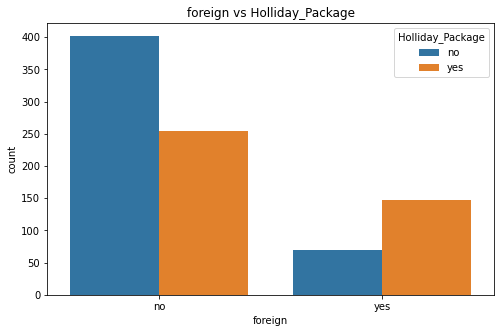

In [1141]:
plt.figure(figsize=(8,5))
sns.countplot(df1['foreign'],hue=df1['Holliday_Package']);
plt.title('foreign vs Holliday_Package')
plt.show()

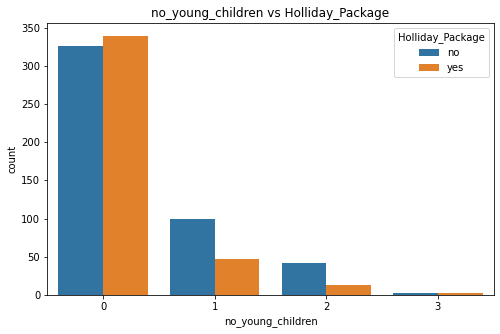

In [1142]:
plt.figure(figsize=(8,5))
sns.countplot(df1['no_young_children'],hue=df1['Holliday_Package']);
plt.title('no_young_children vs Holliday_Package')
plt.show()

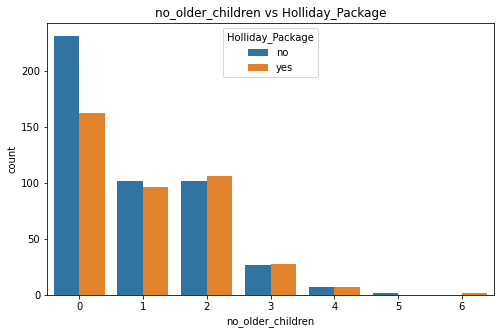

In [1143]:
plt.figure(figsize=(8,5))
sns.countplot(df1['no_older_children'],hue=df1['Holliday_Package']);
plt.title('no_older_children vs Holliday_Package')
plt.show()

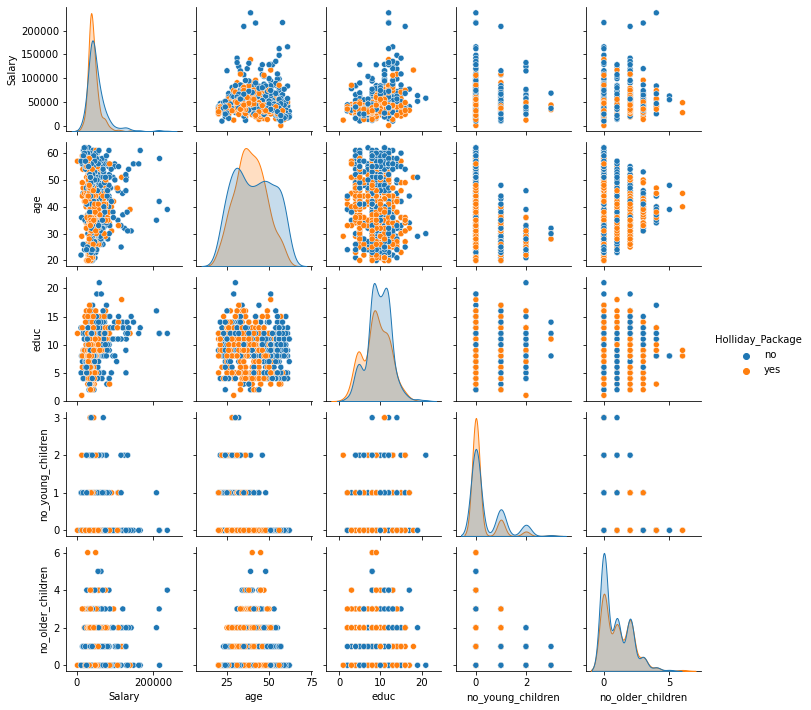

In [1144]:
sns.pairplot(df1, hue='Holliday_Package',diag_kind='kde',size=2)

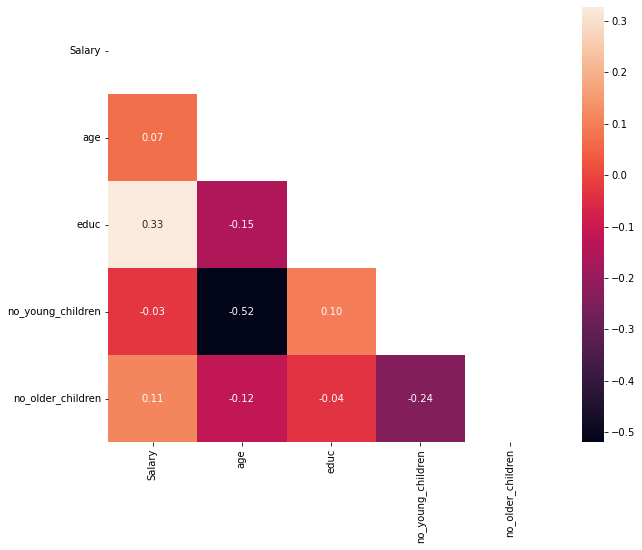

In [1145]:
corr = df1.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

def remove_outlier(col):
    Q1,Q3=col.quantile([0.05,0.95])
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    return lower_limit, upper_limit

feature_list = df1[['Salary','educ']].columns
feature_list

for i in feature_list:
    LL,UL=remove_outlier(df1[i])
    df1[i]=np.where(df1[i]<LL,LL,df1[i])
    df1[i]=np.where(df1[i]>UL,UL,df1[i])

plt.figure(figsize=(12,16))
for i in range(len(feature_list)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[feature_list[i]],data=df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    

In [1146]:
df1.describe()

,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000
mean,47729.172018,39.955275,9.307339,0.311927,0.982798
std,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,53469.500000,48.000000,12.000000,0.000000,2.000000
max,236961.000000,62.000000,21.000000,3.000000,6.000000


In [1147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [1148]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [1149]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [1150]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Holliday_Package   872 non-null    int8 
 1   Salary             872 non-null    int64
 2   age                872 non-null    int64
 3   educ               872 non-null    int64
 4   no_young_children  872 non-null    int64
 5   no_older_children  872 non-null    int64
 6   foreign            872 non-null    int8 
dtypes: int64(5), int8(2)
memory usage: 35.9 KB


In [1151]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [1152]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Holliday_Package,872.0,0.459862,0.498672,0.0,0.0,0.0,1.0,1.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872.0,0.247706,0.431928,0.0,0.0,0.0,0.0,1.0


In [1153]:
pd.DataFrame(round(df1['Holliday_Package'].value_counts(normalize=True),2))

,Holliday_Package
0,0.54
1,0.46


In [1154]:
df1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [1155]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [1156]:
# Copy all the predictor variables into X dataframe
X = df1.drop('Holliday_Package', axis=1)

# Copy target into the y dataframe. 
y = df1['Holliday_Package']

In [1157]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df1['Holliday_Package'])

In [1158]:
print('X_train_1',X_train.shape)
print('X_test_1',X_test.shape)
print('Y_train_1',y_train.shape)
print('Y_test_1',y_test.shape)

X_train_1 (610, 6)
X_test_1 (262, 6)
Y_train_1 (610,)
Y_test_1 (262,)


In [1159]:
param_grid = {
  'solver':['newton-cg','liblinear','lbfgs'],
    'max_iter':[10000,15000],
    'penalty':['l2','none','l1'],
    'verbose':[True],
    'n_jobs':[2],
    'tol':[0.001,0.00000001],
}

dtcl = LogisticRegression(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 3)

In [1160]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concu

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=1),
             param_grid={'max_iter': [10000, 15000], 'n_jobs': [2],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs'],
                         'tol': [0.001, 1e-08], 'verbose': [True]})

In [1161]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', random_state=1,
                   solver='liblinear', tol=1e-08, verbose=True)

In [1162]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [1163]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, best_grid.coef_[0][idx]))

The coefficient for Salary is -1.6088717566770156e-05
The coefficient for age is -0.04977888040047271
The coefficient for educ is 0.06809199197180006
The coefficient for no_young_children is -1.226457876057361
The coefficient for no_older_children is -0.010272545996478099
The coefficient for foreign is 1.248742465494623


### Getting the Predicted Classes and Probs

In [1164]:
ytest_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.677210,0.322790
1,0.565096,0.434904
2,0.688802,0.311198
3,0.516298,0.483702
4,0.545854,0.454146


## Model Evaluation

In [1165]:
# Accuracy - Training Data
best_grid.score(X_train, y_train)

0.6672131147540984

### AUC and ROC for the training data

AUC: 0.735


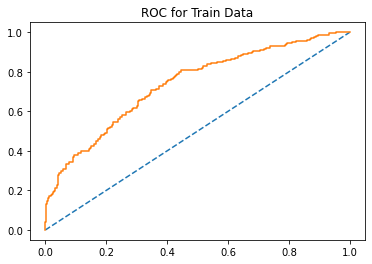

In [1166]:
# predict probabilities
lr_probs_train = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs_train[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, lr_probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr);
plt.title('ROC for Train Data')
plt.show()

In [1167]:
# Accuracy - Test Data
best_grid.score(X_test, y_test)

0.6603053435114504

### AUC and ROC for the test data

AUC: 0.718


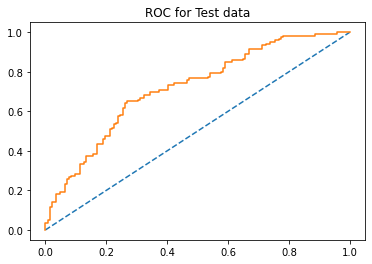

In [1168]:
# predict probabilities
lr_probs_test = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs1 = lr_probs_test[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, lr_probs1)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr);
plt.title('ROC for Test data')
plt.show()

### Confusion Matrix for the training data

In [1169]:
confusion_matrix(y_train, ytrain_predict)

array([[247,  82],
       [121, 160]], dtype=int64)

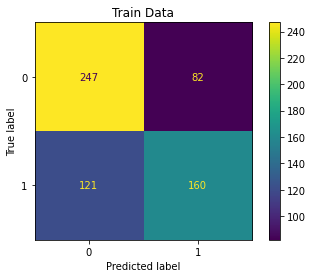

In [1170]:
plot_confusion_matrix(best_grid,X_train,y_train);
plt.title('Train Data')
plt.show()

In [1171]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



### Confusion Matrix for test data

In [1172]:
confusion_matrix(y_test, ytest_predict)

array([[110,  32],
       [ 57,  63]], dtype=int64)

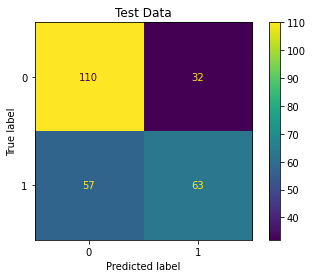

In [1173]:
plot_confusion_matrix(best_grid,X_test,y_test);
plt.title('Test Data')
plt.show()

In [1174]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       142
           1       0.66      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262



In [1175]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
lr_df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(lr_df.loc["1"][2],2)
lr_train_recall=round(lr_df.loc["1"][1],2)
lr_train_precision=round(lr_df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_tain_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_tain_f1  0.61


In [1176]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
lr_df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(lr_df.loc["1"][2],2)
lr_test_recall=round(lr_df.loc["1"][1],2)
lr_test_precision=round(lr_df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_tain_f1 ',lr_test_f1)

lr_test_precision  0.66
lr_test_recall  0.52
lr_tain_f1  0.59


In [1177]:
lr_train_score=best_grid.score(X_train, y_train)
lr_train_score

0.6672131147540984

In [1178]:
lr_test_score=best_grid.score(X_test, y_test)
lr_test_score

0.6603053435114504

### LDA Model

In [1179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [1180]:
lda = LinearDiscriminantAnalysis()
model=lda.fit(X_train,y_train)

In [1181]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [1182]:
ytrain_predict_prob=model.predict_proba(X_train)
pd.DataFrame(ytrain_predict_prob).head()

,0,1
0,0.261849,0.738151
1,0.710383,0.289617
2,0.617657,0.382343
3,0.235165,0.764835
4,0.533171,0.466829


In [1183]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.708475,0.291525
1,0.533448,0.466552
2,0.717871,0.282129
3,0.504865,0.495135
4,0.555863,0.444137


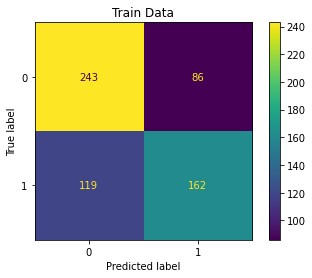

In [1184]:
plot_confusion_matrix(model,X_train,y_train);
plt.title('Train Data')
plt.show()

In [1185]:
confusion_matrix(y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

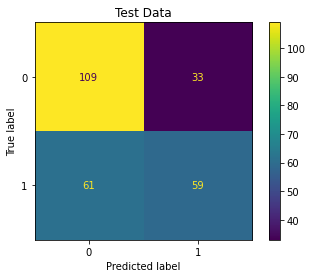

In [1186]:
plot_confusion_matrix(model,X_test,y_test);
plt.title('Test Data')
plt.show()

In [1187]:
print('Training Data report :\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Testing Data report:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Training Data report :

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Testing Data report:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262
 



In [1188]:
# Accuracy - Test Data
lda1_test_score=model.score(X_test, y_test)
lda1_test_score

0.6412213740458015

In [1189]:
lda1_train_score=model.score(X_train, y_train)
lda1_train_score

0.6639344262295082

### AUC and ROC for the test data

AUC: 0.733


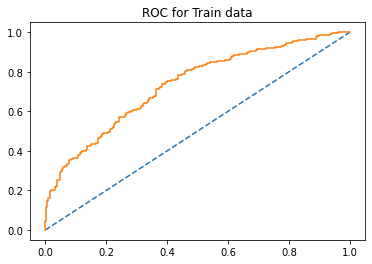

In [1190]:
# predict probabilities
lda1_probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lda_probs_train1 = lda1_probs_train[:, 1]
# calculate AUC
lda1_auc_train = roc_auc_score(y_train, lda_probs_train1)
print('AUC: %.3f' % lda1_auc_train)
# calculate roc curve
lda1_train_fpr, lda1_train_tpr, lda1_train_thresholds = roc_curve(y_train, lda_probs_train1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda1_train_fpr, lda1_train_tpr);
plt.title('ROC for Train data')
plt.show()

AUC: 0.714


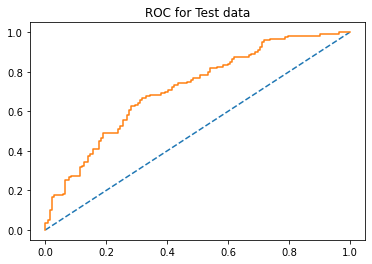

In [1191]:
# predict probabilities
lda1_probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lda_probs1 = lda1_probs_test[:, 1]
# calculate AUC
lda1_test_auc = roc_auc_score(y_test, lda_probs1)
print('AUC: %.3f' % lda1_test_auc)
# calculate roc curve
lda1_test_fpr, lda1_test_tpr, lda1_test_thresholds = roc_curve(y_test, lda_probs1)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda1_test_fpr, lda1_test_tpr);
plt.title('ROC for Test data')
plt.show()

In [1192]:
lda1_metrics=classification_report(y_train, pred_class_train,output_dict=True)
lda1_df=pd.DataFrame(lda1_metrics).transpose()
lda1_train_f1=round(lda1_df.loc["1"][2],2)
lda1_train_recall=round(lda1_df.loc["1"][1],2)
lda1_train_precision=round(lda1_df.loc["1"][0],2)
print ('lda1_train_precision ',lda1_train_precision)
print ('lda1_train_recall ',lda1_train_recall)
print ('lda1_tain_f1 ',lda1_train_f1)

lda1_train_precision  0.65
lda1_train_recall  0.58
lda1_tain_f1  0.61


In [1193]:
lda1_metrics=classification_report(y_test, pred_class_test,output_dict=True)
lda1_df=pd.DataFrame(lda1_metrics).transpose()
lda1_test_f1=round(lda1_df.loc["1"][2],2)
lda1_test_recall=round(lda1_df.loc["1"][1],2)
lda1_test_precision=round(lda1_df.loc["1"][0],2)
print ('lda1_test_precision ',lda1_test_precision)
print ('lda1_test_recall ',lda1_test_recall)
print ('lda1_tain_f1 ',lda1_test_f1)

lda1_test_precision  0.64
lda1_test_recall  0.49
lda1_tain_f1  0.56


# How to change the cut-off values for maximum accuracy?

We will do this exercise only on the training data.

0.1 

Recall Score 0.9964
Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


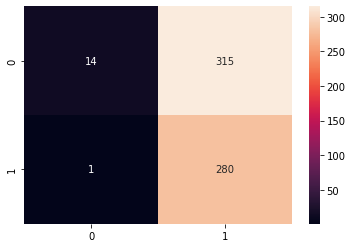

0.2 

Recall Score 0.9644
Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


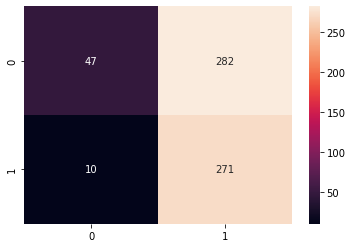

0.3 

Recall Score 0.8932
Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


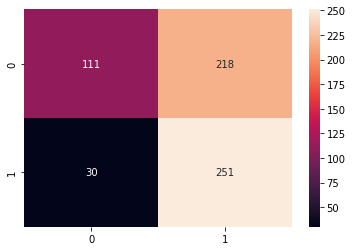

0.4 

Recall Score 0.758
Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


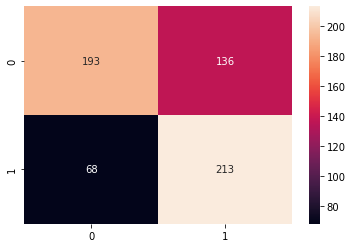

0.5 

Recall Score 0.5765
Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


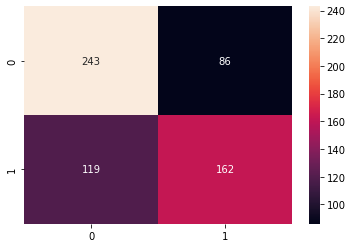

0.6 

Recall Score 0.4235
Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


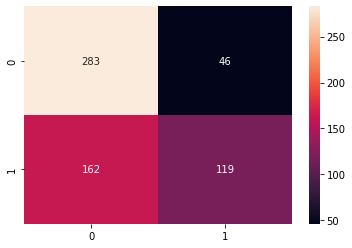

0.7 

Recall Score 0.2989
Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


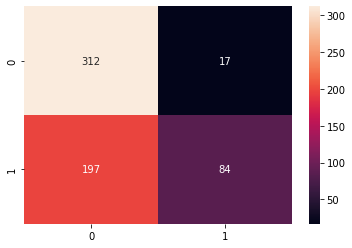

0.8 

Recall Score 0.1103
Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


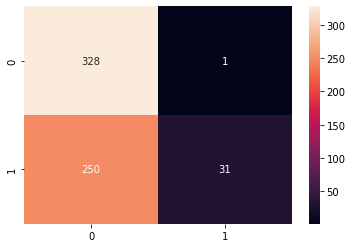

0.9 

Recall Score 0.0071
Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


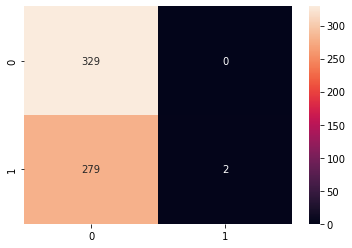

In [1194]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(ytrain_predict_prob[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [1195]:
#Predicting the classes on the train data
data_pred_custom_cutoff_train=[]
for i in range(0,len(lda_probs_train[:,1])):
    if np.array(lda_probs_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_train.append(a)

In [1196]:
#Predicting the classes on the test data

data_pred_custom_cutoff_test=[]
for i in range(0,len(lda_probs_test[:,1])):
    if np.array(lda_probs_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff_test.append(a)

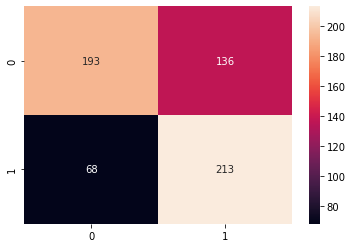

In [1197]:
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_cutoff_train)),annot=True,fmt='.5g');

In [1198]:
confusion_matrix(y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

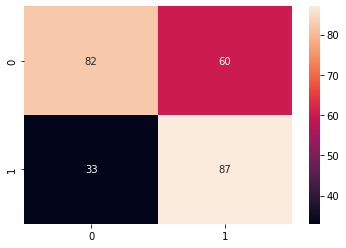

In [1199]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff_test)),annot=True,fmt='.5g');

In [1200]:
print('Training Data report :\n\n',metrics.classification_report(y_train,data_pred_custom_cutoff_train),'\n')
print('Testing Data report:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff_test),'\n')

Training Data report :

               precision    recall  f1-score   support

           0       0.74      0.59      0.65       329
           1       0.61      0.76      0.68       281

    accuracy                           0.67       610
   macro avg       0.67      0.67      0.67       610
weighted avg       0.68      0.67      0.66       610
 

Testing Data report:

               precision    recall  f1-score   support

           0       0.71      0.58      0.64       142
           1       0.59      0.72      0.65       120

    accuracy                           0.65       262
   macro avg       0.65      0.65      0.64       262
weighted avg       0.66      0.65      0.64       262
 



In [1201]:
# Accuracy - Test Data
lda2_test_score=model.score(X_test, y_test)
lda2_test_score

0.6412213740458015

In [1202]:
# Accuracy - Train Data
lda2_train_score=model.score(X_train, y_train)
lda2_train_score

0.6639344262295082

### AUC and ROC for the train data

AUC: 0.672


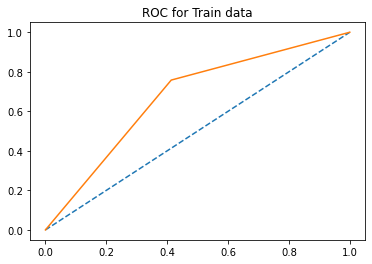

In [1203]:

# calculate AUC
lda2_train_auc = roc_auc_score(y_train,data_pred_custom_cutoff_train)
print('AUC: %.3f' % lda2_train_auc)
# calculate roc curve
lda2_train_fpr, lda2_train_tpr, lda2_train_thresholds = roc_curve(y_train,data_pred_custom_cutoff_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda2_train_fpr, lda2_train_tpr);
plt.title('ROC for Train data')
plt.show()

AUC: 0.651


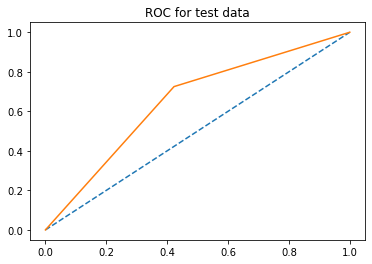

In [1204]:
lda2_test_auc = roc_auc_score(y_test, data_pred_custom_cutoff_test)
print('AUC: %.3f' % lda2_test_auc)
# calculate roc curve
lda2_test_fpr, lda2_test_tpr, lda2_test_thresholds = roc_curve(y_test, data_pred_custom_cutoff_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda2_test_fpr, lda2_test_tpr);
plt.title('ROC for test data')
plt.show()

In [1205]:
lda2_metrics=classification_report(y_test, data_pred_custom_cutoff_test,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics).transpose()
lda2_test_f1=round(lda2_df.loc["1"][2],2)
lda2_test_recall=round(lda2_df.loc["1"][1],2)
lda2_test_precision=round(lda2_df.loc["1"][0],2)
print ('lda2_test_precision ',lda2_test_precision)
print ('lda2_test_recall ',lda2_test_recall)
print ('lda2_train_f1 ',lda2_test_f1)

lda2_test_precision  0.59
lda2_test_recall  0.72
lda2_train_f1  0.65


In [1206]:
lda2_metrics=classification_report(y_train, data_pred_custom_cutoff_train,output_dict=True)
lda2_df=pd.DataFrame(lda2_metrics).transpose()
lda2_train_f1=round(lda2_df.loc["1"][2],2)
lda2_train_recall=round(lda2_df.loc["1"][1],2)
lda2_train_precision=round(lda2_df.loc["1"][0],2)
print ('lda2_train_precision ',lda2_train_precision)
print ('lda2_train_recall ',lda2_train_recall)
print ('lda2_train_f1 ',lda2_train_f1)

lda2_train_precision  0.61
lda2_train_recall  0.76
lda2_train_f1  0.68


In [1207]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame({'LDA Train(cut_of_0.5)':[lda1_train_score,lda1_auc_train,lda1_train_precision,lda1_train_recall,lda1_train_f1],
        'LDA Test(cut_of_0.5)':[lda1_test_score,lda1_test_auc,lda1_test_precision,lda1_test_recall,lda1_test_f1],
       'LDA Train(cut_of_0.4)':[lda2_train_score,lda2_train_auc,lda2_train_precision,lda2_train_recall,lda2_train_f1],
        'LDA Test(cut_of_0.4)':[lda2_test_score,lda2_test_auc,lda2_test_precision,lda2_test_recall,lda2_test_f1]},index=index)

round(data,2)

,LDA Train(cut_of_0.5),LDA Test(cut_of_0.5),LDA Train(cut_of_0.4),LDA Test(cut_of_0.4)
Accuracy,0.66,0.64,0.66,0.64
AUC,0.73,0.71,0.67,0.65
Precision,0.65,0.64,0.61,0.59
Recall,0.58,0.49,0.76,0.72
F1 Score,0.61,0.56,0.68,0.65


In [1215]:
index=['Accuracy', 'AUC', 'Precision','Recall','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_score,lr_train_auc,lr_train_precision,lr_train_recall,lr_train_f1],
        'LR Test':[lr_test_score,lr_test_auc,lr_test_precision,lr_test_recall,lr_test_f1],
       'LDA Train':[lda2_train_score,lda2_train_auc,lda2_train_precision,lda2_train_recall,lda2_train_f1],
        'LDA Test':[lda2_test_score,lda2_test_auc,lda2_test_precision,lda2_test_recall,lda2_test_f1]},index=index)

round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.66,0.66,0.64
AUC,0.73,0.72,0.67,0.65
Precision,0.66,0.66,0.61,0.59
Recall,0.57,0.52,0.76,0.72
F1 Score,0.61,0.59,0.68,0.65


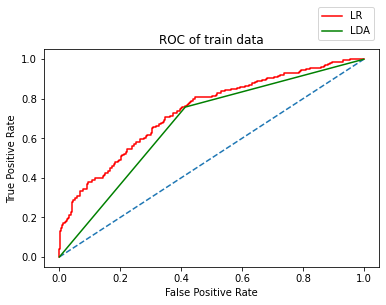

In [1212]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(lda2_train_fpr,lda2_train_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of train data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

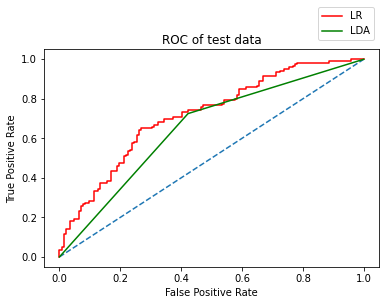

In [1214]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(lda2_test_fpr,lda2_test_tpr,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of test data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

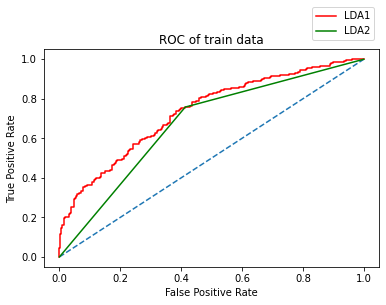

In [1210]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda1_train_fpr,lda1_train_tpr,color='red',label="LDA1")
plt.plot(lda2_train_fpr,lda2_train_tpr,color='green',label="LDA2")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of train data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')